# By Christian Wegert

# Assignment - Image Classification with CNNs
![CIFAR10](https://miro.medium.com/max/964/1*syyml8q8s1Yt-iEea5m1Ag.png)

[CIFAR 10](https://www.cs.toronto.edu/~kriz/cifar.html) is a small toy data set for image classifaction. 

* It has 60k images from ten diffenrent classes (like car, airplane, horse,..)
* The RGB images are of size 32x32 pixels  

In [1]:
#import needed libs
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import os

#some vars to controll the training -> use them in your code
batch_size = 32
num_classes = 10 #fixed!
epochs = 10

# Get the data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


## Task:
* visualize some sample images from different classes
* build and train the ***AlexNet*** CNN architecture from the lecture, use the following Keras layers:
    * overview: https://keras.io/api/layers/
    * 2d convolution: https://keras.io/api/layers/convolution_layers/convolution2d/
    * Fully Connected (=Matrix Multiplication MLP): https://keras.io/api/layers/core_layers/dense/
    * Pooling: https://keras.io/api/layers/pooling_layers/max_pooling2d/   
* use 'relu' functions for the non-linear activation -> https://keras.io/api/layers/activation_layers/relu/
* optimize the learning hyper-paramters to get the best  test accuracy

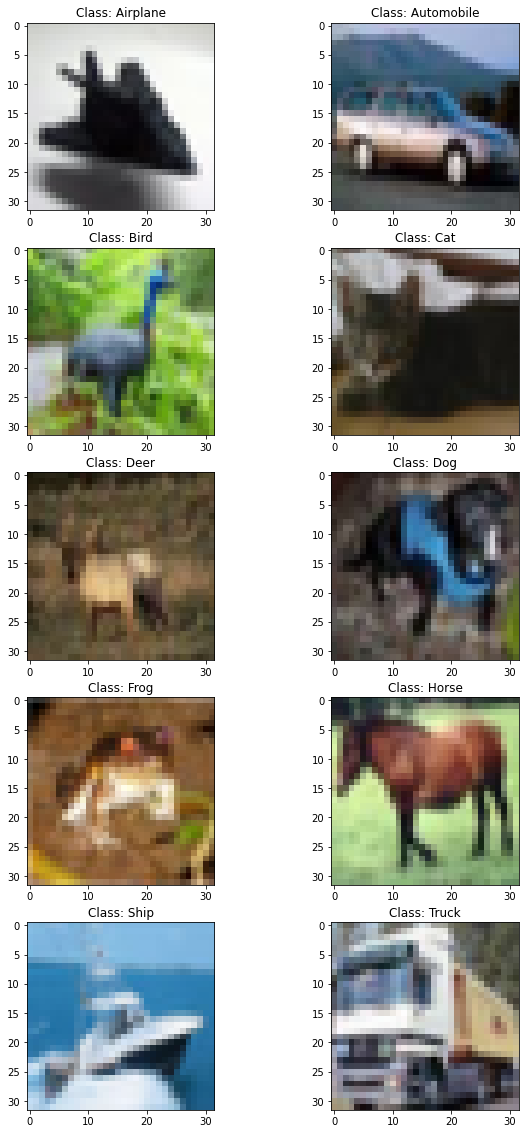

In [64]:
fig, axes = plt.subplots(5,2,figsize=(10,20))

for j in range (0,1000):
        if(y_train[j][0] == 1):
            axes[0,0].imshow(x_train[j])
            axes[0,0].set_title('Class: Airplane')
            break
            
for j in range (0,1000):
        if(y_train[j][1] == 1):
            axes[0,1].imshow(x_train[j])
            axes[0,1].set_title('Class: Automobile')
            break
            
for j in range (0,1000):
        if(y_train[j][2] == 1):
            axes[1,0].imshow(x_train[j])
            axes[1,0].set_title('Class: Bird')
            break
            
for j in range (0,1000):
        if(y_train[j][3] == 1):
            axes[1,1].imshow(x_train[j])
            axes[1,1].set_title('Class: Cat')
            break
            
for j in range (0,1000):
        if(y_train[j][4] == 1):
            axes[2,0].imshow(x_train[j])
            axes[2,0].set_title('Class: Deer')
            break
            
for j in range (0,1000):
        if(y_train[j][5] == 1):
            axes[2,1].imshow(x_train[j])
            axes[2,1].set_title('Class: Dog')
            break
            
for j in range (0,1000):
        if(y_train[j][6] == 1):
            axes[3,0].imshow(x_train[j])
            axes[3,0].set_title('Class: Frog')
            break
            
for j in range (0,1000):
        if(y_train[j][7] == 1):
            axes[3,1].imshow(x_train[j])
            axes[3,1].set_title('Class: Horse')
            break
            
for j in range (0,1000):
        if(y_train[j][8] == 1):
            axes[4,0].imshow(x_train[j])
            axes[4,0].set_title('Class: Ship')
            break
            
for j in range (0,1000):
        if(y_train[j][9] == 1):
            axes[4,1].imshow(x_train[j])
            axes[4,1].set_title('Class: Truck')
            break

In [ ]:
#Creating Model
#Code from AlexCNN-Example with adaptions

from tensorflow.keras import layers

inputs = keras.Input(shape=(32, 32, 3))

#Convolution Layer 1
l1 = layers.Conv2D(filters=96, input_shape=(32,32,3), kernel_size=(11,11), strides=(4,4), padding='same')(inputs)
l2 = layers.BatchNormalization()(l1)
l3 = layers.Activation('relu')(l2)   
l4 = layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same')(l3)

#Convolution Layer 2
l5 = layers.Conv2D(filters=256, kernel_size=(5, 5), strides=(1,1), padding='same')(l4)
l6 = layers.BatchNormalization()(l5)
l7 = layers.Activation('relu')(l6)
l8 = layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same')(l7)

#Convolution Layer 3
l9 = layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same')(l8)
l10 = layers.BatchNormalization()(l9)
l11 = layers.Activation('relu')(l10)

#Convolution Layer 4    
l12 = layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same')(l11)
l13 = layers.BatchNormalization()(l12)
l14 = layers.Activation('relu')(l13)

#Convolution Layer 5    
l15 = layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same')(l14)
l16 = layers.BatchNormalization()(l15)
l17 = layers.Activation('relu')(l16)
l18 = layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same')(l17)

#Fully Connected Layer 1
l19 = layers.Flatten()(l18)
l20 = layers.Dense(4096, input_shape=(32,32,3,))(l19)
l21 = layers.BatchNormalization()(l20)
l22 = layers.Activation('relu')(l21)
l23 = layers.Dropout(0.4)(l22)

#Fully Connected Layer 2
l24 = layers.Dense(4096)(l23)
l25 = layers.BatchNormalization()(l24)
l26 = layers.Activation('relu')(l25)
l27 = layers.Dropout(0.4)(l26)

#Fully Connected Layer 3
l28 = layers.Dense(4096)(l27)
l29 = layers.BatchNormalization()(l28)
l30 = layers.Activation('relu')(l29)
l31 = layers.Dropout(0.4)(l30)

#Output Layer
l32 = layers.Dense(10)(l31)
l33 = layers.BatchNormalization()(l32)
outputs = layers.Activation('softmax')(l33)

In [ ]:
#build model
model = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
#summarize model
model.summary()

In [ ]:
#compile model
model.compile(loss = keras.losses.categorical_crossentropy, optimizer= 'adam', metrics=['accuracy'])

In [ ]:
model.fit(x_train, y_train, epochs=10)